# ***Virat Kohli IPL Statistic Analysis***

---


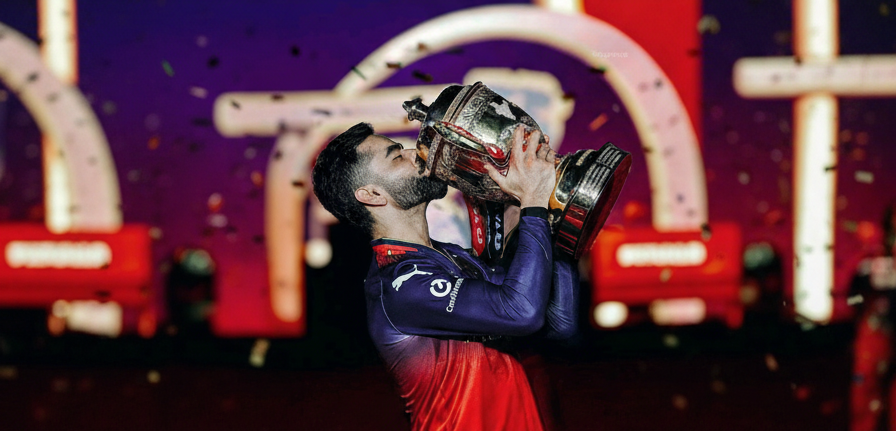

Welcome to a statistical exploration of 'King Kohli's' kingdom—the Indian Premier League. While fans celebrate his impeccable cover drives and aggressive captaincy, this project aims to uncover the story told by the data. We analyze his performance against different teams, at various phases to paint a complete picture of his impact. This is a journey through the numbers that have made Virat Kohli an IPL icon.

This project provides an in-depth statistical analysis of Virat Kohli's performance throughout his Indian Premier League (IPL) career up until 2024. By leveraging Python's data analysis and visualization libraries, this project explores various facets of his batting statistics...

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Ipl_stat_Virat_Kohli.csv")
df.columns = df.columns.str.strip()

print(df)

      match_id  inning                 batting_team           bowling_team  \
0       335982       2  Royal Challengers Bangalore  Kolkata Knight Riders   
1       335982       2  Royal Challengers Bangalore  Kolkata Knight Riders   
2       335982       2  Royal Challengers Bangalore  Kolkata Knight Riders   
3       335985       2  Royal Challengers Bangalore         Mumbai Indians   
4       335985       2  Royal Challengers Bangalore         Mumbai Indians   
...        ...     ...                          ...                    ...   
6231   1426306       1  Royal Challengers Bengaluru    Chennai Super Kings   
6232   1426306       1  Royal Challengers Bengaluru    Chennai Super Kings   
6233   1426306       1  Royal Challengers Bengaluru    Chennai Super Kings   
6234   1426310       1  Royal Challengers Bengaluru       Rajasthan Royals   
6235    980999       1  Royal Challengers Bangalore        Kings XI Punjab   

      over  ball   batter           bowler   non_striker  batsm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          6236 non-null   int64 
 1   inning            6236 non-null   int64 
 2   batting_team      6236 non-null   object
 3   bowling_team      6236 non-null   object
 4   over              6236 non-null   int64 
 5   ball              6236 non-null   int64 
 6   batter            6236 non-null   object
 7   bowler            6236 non-null   object
 8   non_striker       6236 non-null   object
 9   batsman_runs      6236 non-null   int64 
 10  extra_runs        6236 non-null   int64 
 11  total_runs        6236 non-null   int64 
 12  extras_type       241 non-null    object
 13  is_wicket         6236 non-null   int64 
 14  player_dismissed  218 non-null    object
 15  dismissal_kind    218 non-null    object
 16  fielder           162 non-null    object
dtypes: int64(8), o

In [ ]:
df['batting_team'] = df['batting_team'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
df['bowling_team'] = df['bowling_team'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
df['bowling_team'] = df['bowling_team'].replace('Delhi Daredevils', 'Delhi Capitals')
df['bowling_team'] = df['bowling_team'].replace('Gujarat Lions', 'Gujarat Titans')
df['bowling_team'] = df['bowling_team'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
df['bowling_team'] = df['bowling_team'].replace('Kings XI Punjab', 'Punjab Kings')

df['player_dismissed'] = df['player_dismissed'].replace('NA', pd.NA)
df = df[df['inning'].isin([1, 2])].copy()



  **Data Cleaning:**
*   There were teams such as Punjab Kings ,Delhi Capitals whose team title was changed afterwards ,as a result I have changed the old title to new and considered them as same team.
*   There was a some level of discrepancy in the innings column ,such rows were removed.








In [39]:
print("------Team's Titles that have participated in the IPL until 2024------")
teams=df["bowling_team"].unique()
teams.sort()
for i in teams:
  print(i)

------Team's Titles that have participated in the IPL until 2024------
Chennai Super Kings
Delhi Capitals
Gujarat Titans
Kochi Tuskers Kerala
Kolkata Knight Riders
Lucknow Super Giants
Mumbai Indians
Pune Warriors
Punjab Kings
Rajasthan Royals
Rising Pune Supergiants
Sunrisers Hyderabad


In [ ]:
total_runs = df['batsman_runs'].sum()
total_balls_faced = df[df['extras_type'] != 'wides'].shape[0]
total_dismissals = df['player_dismissed'].count()
batting_average = total_runs / total_dismissals if total_dismissals > 0 else 0
strike_rate = (total_runs / total_balls_faced) * 100 if total_balls_faced > 0 else 0
fours = df[df['batsman_runs'] == 4].shape[0]
sixes = df[df['batsman_runs'] == 6].shape[0]

print("--- Virat Kohli's Overall Performance ---")
print(f"Total Runs: {total_runs}")
print(f"Total Balls Faced: {total_balls_faced}")
print(f"Total Dismissals: {total_dismissals}")

print(f"Batting Average: {batting_average:.2f}")
print(f"Strike Rate: {strike_rate:.2f}")

print(f"Number of 4s: {fours}")
print(f"Number of 6s: {sixes}")

--- Virat Kohli's Overall Performance ---
Total Runs: 8004
Total Balls Faced: 6065
Total Dismissals: 218
Batting Average: 36.72
Strike Rate: 131.97
Number of 4s: 706
Number of 6s: 273


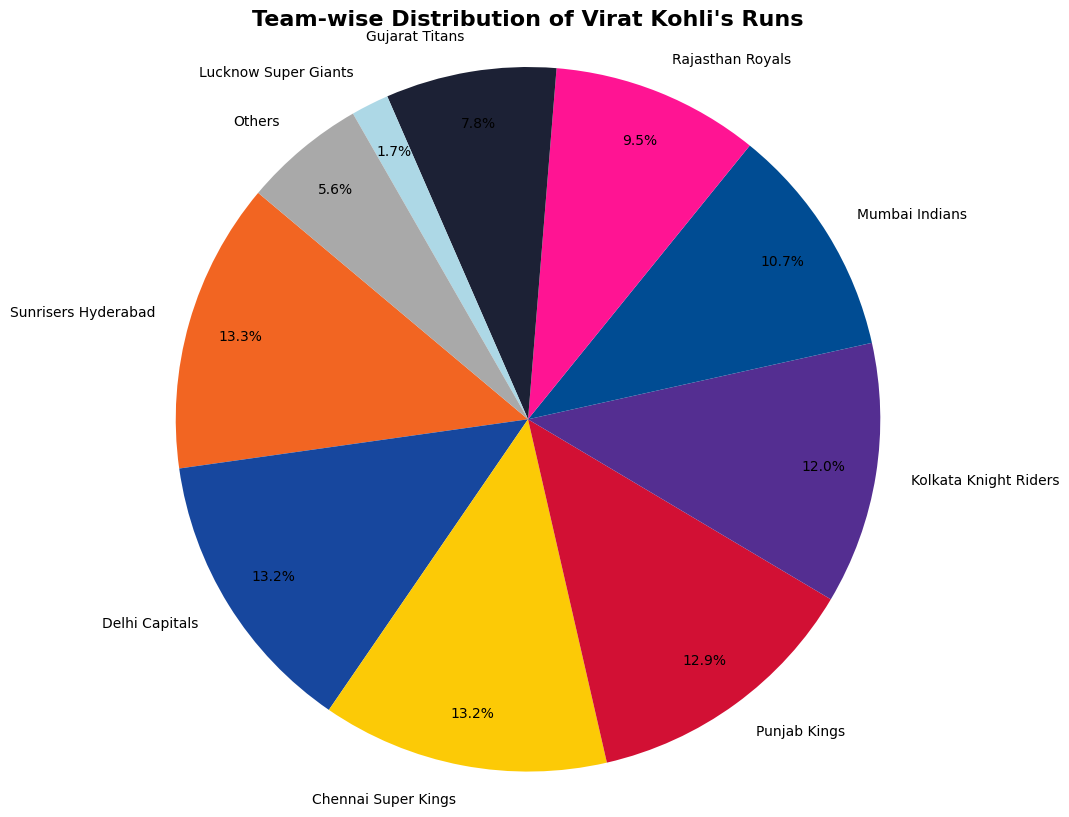

In [ ]:
runs_vs_team = df.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False)

selected_teams = [
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Punjab Kings',
    'Kolkata Knight Riders',
    'Mumbai Indians',
    'Rajasthan Royals',
    'Gujarat Titans',
    'Lucknow Super Giants'
]

top_teams = runs_vs_team.loc[selected_teams]


other_teams_index = runs_vs_team.index.difference(selected_teams)
other_runs = runs_vs_team.loc[other_teams_index].sum()
top_teams['Others'] = other_runs

team_colors = {
    'Sunrisers Hyderabad': '#F26522',
    'Delhi Capitals': '#17479E',
    'Chennai Super Kings': '#FCCA06',
    'Punjab Kings': '#D21034',
    'Kolkata Knight Riders': '#542E91',
    'Mumbai Indians': '#004C93',
    'Rajasthan Royals': '#FF1493',
    'Gujarat Titans': '#1C2135',
    'Lucknow Super Giants': '#ADD8E6',
    'Others': '#A9A9A9'
}

colors = [team_colors.get(team, '#A9A9A9') for team in top_teams.index]
plt.figure(figsize=(10, 10))

plt.pie(
    top_teams,
    labels=top_teams.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=colors
)

plt.title("Team-wise Distribution of Virat Kohli's Runs", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

In [ ]:
other_teams = other_teams_index.tolist()

print("Teams included in the 'Others' category:")
for team in other_teams:
    print(team)

Teams included in the 'Others' category:
Kochi Tuskers Kerala
Pune Warriors
Rising Pune Supergiants


**Virat Kohli's Performance Against Each Team**

This table shows a breakdown of Virat Kohli's batting performance against each team in the IPL, including total runs, batting average, strike rate, and the number of 4s and 6s scored.

In [53]:
team_performance = df.groupby('bowling_team').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    dismissals=('player_dismissed', lambda x: x.notna().sum()),
    fours=('batsman_runs', lambda x: (x == 4).sum()),
    sixes=('batsman_runs', lambda x: (x == 6).sum())
).reset_index()

team_performance['batting_average'] = team_performance.apply(
    lambda row: row['total_runs'] / row['dismissals'] if row['dismissals'] > 0 else 0, axis=1
)
team_performance['strike_rate'] = team_performance.apply(
    lambda row: (row['total_runs'] / row['balls_faced']) * 100 if row['balls_faced'] > 0 else 0, axis=1
)
team_wise_stats = team_performance[[
    'bowling_team',
    'total_runs',
    'batting_average',
    'strike_rate',
    'fours',
    'sixes'
]]
team_wise_stats.columns = [
    'Bowling Team',
    'Runs',
    'Average',
    'Strike Rate',
    '4s',
    '6s'
]
team_wise_stats = team_wise_stats.sort_values(by='Runs', ascending=False).reset_index(drop=True)
team_wise_stats.index = team_wise_stats.index + 1

display(team_wise_stats)

,Bowling Team,Runs,Average,Strike Rate,4s,6s
1,Sunrisers Hyderabad,1068,34.451613,135.361217,99,42
2,Delhi Capitals,1057,42.280000,132.290363,96,31
3,Chennai Super Kings,1053,33.967742,122.299652,76,42
4,Punjab Kings,1030,34.333333,128.911139,108,32
5,Kolkata Knight Riders,962,37.000000,130.706522,84,28
6,Mumbai Indians,855,30.535714,122.668580,70,32
7,Rajasthan Royals,764,29.384615,117.177914,65,23
8,Gujarat Titans,627,89.571429,145.475638,59,22
9,Rising Pune Supergiants,271,90.333333,138.974359,22,11
10,Lucknow Super Giants,139,27.800000,115.833333,11,5


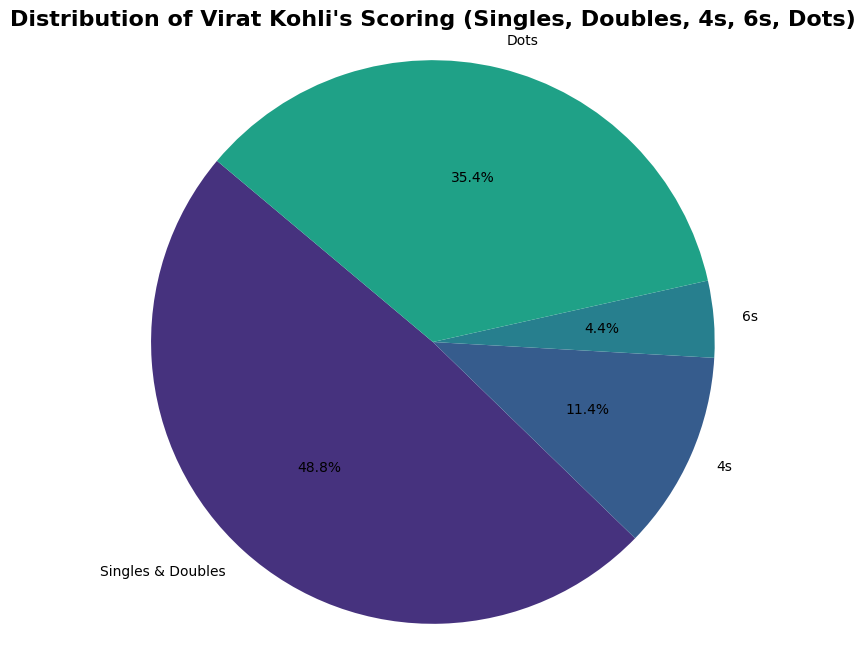

In [41]:
singles_doubles_count = df[df['batsman_runs'].isin([1, 2])].shape[0]
fours_count = df[df['batsman_runs'] == 4].shape[0]
sixes_count = df[df['batsman_runs'] == 6].shape[0]
dots_count = df[df['batsman_runs'] == 0].shape[0]

scoring_distribution = pd.Series({
    'Singles & Doubles': singles_doubles_count,
    '4s': fours_count,
    '6s': sixes_count,
    'Dots': dots_count
})


colors = sns.color_palette('viridis')[0:len(scoring_distribution)]
plt.figure(figsize=(8,8))
plt.pie(
    scoring_distribution,
    labels=scoring_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Distribution of Virat Kohli's Scoring (Singles, Doubles, 4s, 6s, Dots)", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

**Virat Kohli's Performance by Phase of Innings**

This table provides insights into Virat Kohli's batting performance across different phases of an IPL innings: Powerplay (overs 1-6), Middle Overs (overs 7-15), and Death Overs (overs 16-20). It includes total runs, strike rate, and boundary statistics for each phase.

In [ ]:
powerplay_overs = range(1, 7)
middle_overs = range(7, 16)
death_overs = range(16, 21)

def calculate_phase_stats(df, phase_overs):
    phase_df = df[df['over'].isin(phase_overs)].copy()

    total_runs = phase_df['batsman_runs'].sum()
    balls_faced = phase_df[phase_df['extras_type'] != 'wides'].shape[0]
    strike_rate = (total_runs / balls_faced) * 100 if balls_faced > 0 else 0

    fours = phase_df[phase_df['batsman_runs'] == 4].shape[0]
    sixes = phase_df[phase_df['batsman_runs'] == 6].shape[0]
    singles_doubles = phase_df[phase_df['batsman_runs'].isin([1, 2])].shape[0]
    dots = phase_df[phase_df['batsman_runs'] == 0].shape[0]

    boundaries = fours + sixes
    balls_per_boundary = balls_faced / boundaries if boundaries > 0 else 0

    return {
        'Runs': total_runs,
        'Strike Rate': strike_rate,
        '4s': fours,
        '6s': sixes,
        'Singles & Doubles': singles_doubles,
        'Dots': dots,
        'Balls per Boundary': balls_per_boundary
    }


powerplay_stats = calculate_phase_stats(df, powerplay_overs)
middle_overs_stats = calculate_phase_stats(df, middle_overs)
death_overs_stats = calculate_phase_stats(df, death_overs)

phase_wise_stats = pd.DataFrame({
    'Phase': ['(1-6) overs', '(7-15) overs', '(16-20) overs'],
    'Runs': [powerplay_stats['Runs'], middle_overs_stats['Runs'], death_overs_stats['Runs']],
    'Strike Rate': [powerplay_stats['Strike Rate'], middle_overs_stats['Strike Rate'], death_overs_stats['Strike Rate']],
    '4s': [powerplay_stats['4s'], middle_overs_stats['4s'], death_overs_stats['4s']],
    '6s': [powerplay_stats['6s'], middle_overs_stats['6s'], death_overs_stats['6s']],
    'Singles & Doubles': [powerplay_stats['Singles & Doubles'], middle_overs_stats['Singles & Doubles'], death_overs_stats['Singles & Doubles']],
    'Dots': [powerplay_stats['Dots'], middle_overs_stats['Dots'], death_overs_stats['Dots']],
    'Balls per Boundary': [powerplay_stats['Balls per Boundary'], middle_overs_stats['Balls per Boundary'], death_overs_stats['Balls per Boundary']]
})


display(phase_wise_stats)

,Phase,Runs,Strike Rate,4s,6s,Singles & Doubles,Dots,Balls per Boundary
0,(1-6) overs,2699,118.429136,303,64,959,1008,6.209809
1,(7-15) overs,3737,130.436300,260,127,1676,861,7.403101
2,(16-20) overs,1099,200.914077,78,71,278,141,3.671141


**Virat Kohli's Performance by Over**

This table presents a detailed breakdown of Virat Kohli's batting performance in each over of an IPL innings, including total runs, strike rate, 4s, 6s, and dot balls.

In [43]:
over_performance = df.groupby('over').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    fours=('batsman_runs', lambda x: (x == 4).sum()),
    sixes=('batsman_runs', lambda x: (x == 6).sum()),
    dots=('batsman_runs', lambda x: (x == 0).sum())
).reset_index()

over_performance['strike_rate'] = over_performance.apply(
    lambda row: (row['total_runs'] / row['balls_faced']) * 100 if row['balls_faced'] > 0 else 0, axis=1
)
over_performance['over'] = over_performance['over'] + 1
over_wise_stats = over_performance[[
    'over',
    'total_runs',
    'strike_rate',
    'fours',
    'sixes',
    'dots'
]]

over_wise_stats.columns = [
    'Over',
    'Total Runs',
    'Strike Rate',
    '4s',
    '6s',
    'Dots'
]

display(over_wise_stats)

,Over,Total Runs,Strike Rate,4s,6s,Dots
0,1,469,121.188630,65,11,188
1,2,448,111.720698,59,8,197
2,3,448,115.762274,53,12,179
3,4,534,132.835821,67,14,168
4,5,451,118.997361,52,14,165
5,6,449,116.020672,50,9,159
6,7,369,95.103093,22,7,140
7,8,436,110.659898,31,9,128
8,9,439,120.604396,28,16,106
9,10,456,124.250681,28,18,108


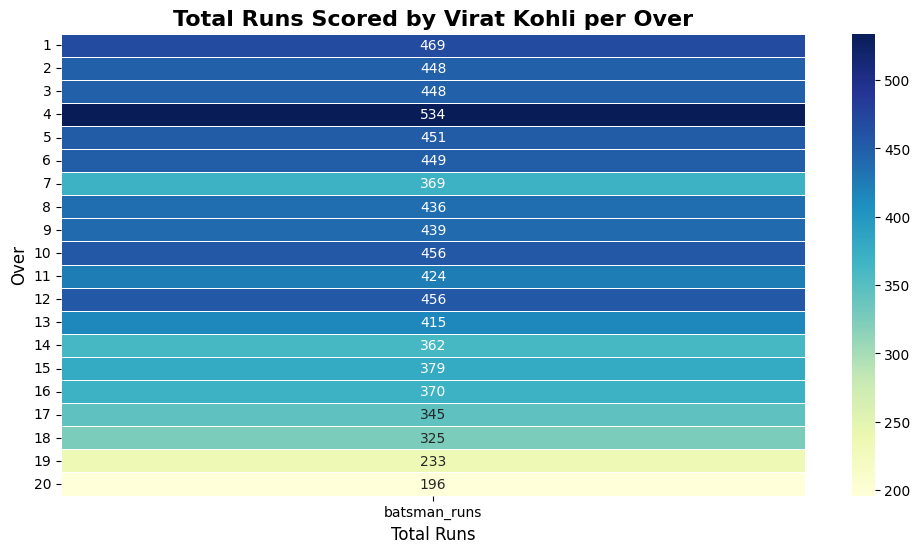

In [46]:
runs_per_over = df.groupby('over')['batsman_runs'].sum().reset_index()
runs_per_over['over'] = runs_per_over['over'] + 1

plt.figure(figsize=(12, 6))
sns.heatmap(runs_per_over.set_index('over'), annot=True, cmap='YlGnBu', fmt=".0f", linewidths=.5)
plt.title("Total Runs Scored by Virat Kohli per Over", fontsize=16, fontweight='bold')
plt.xlabel("Total Runs", fontsize=12)
plt.ylabel("Over", fontsize=12)
plt.yticks(rotation=0)
plt.show()

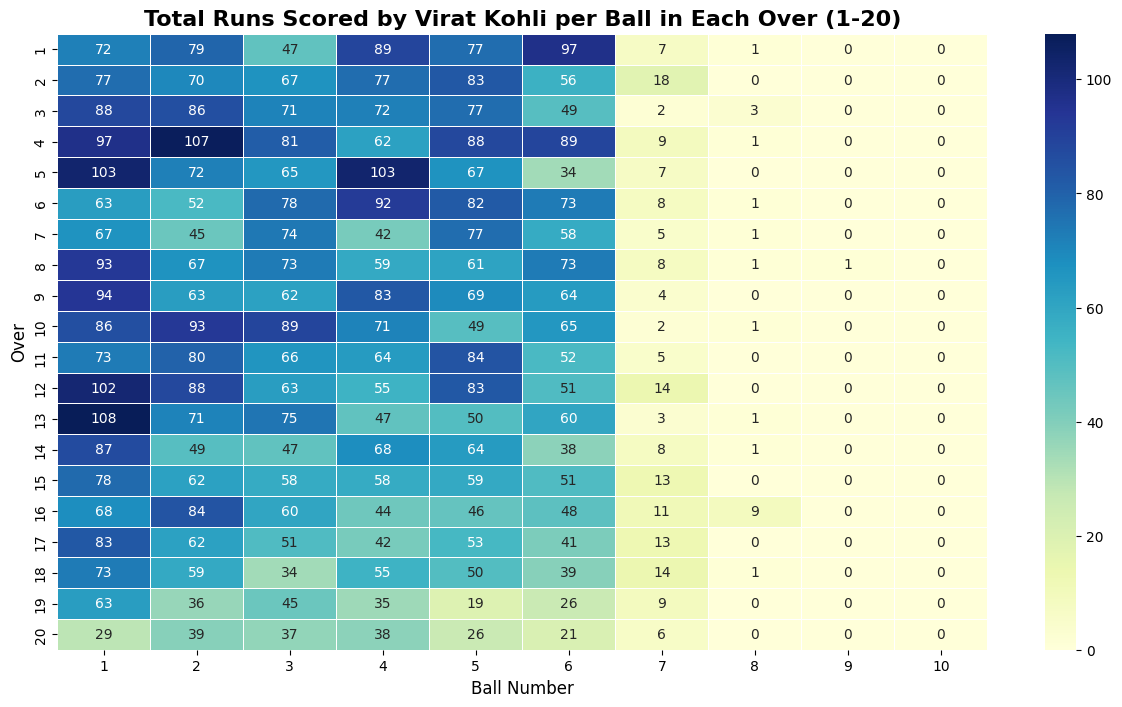

In [ ]:
runs_per_ball_over = df.groupby(['over', 'ball'])['batsman_runs'].sum().unstack(fill_value=0)
runs_per_ball_over.index = runs_per_ball_over.index + 1

plt.figure(figsize=(15, 8))
sns.heatmap(runs_per_ball_over, annot=True, cmap='YlGnBu', fmt=".0f", linewidths=.5)
plt.title("Total Runs Scored by Virat Kohli per Ball in Each Over (1-20)", fontsize=16, fontweight='bold')
plt.xlabel("Ball Number", fontsize=12)
plt.ylabel("Over", fontsize=12)
plt.show()

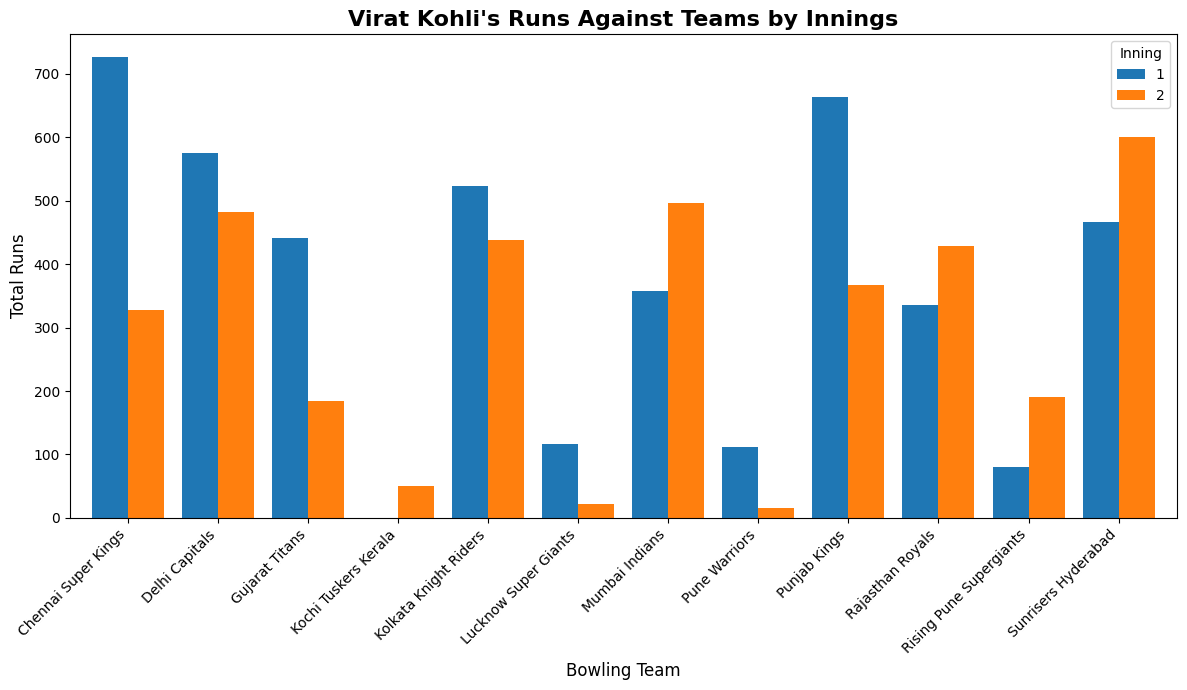

In [ ]:
runs_by_inning_team = df.groupby(['bowling_team', 'inning'])['batsman_runs'].sum().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 7))

runs_by_inning_team.plot(kind='bar', ax=ax, width=0.8)

ax.set_title("Virat Kohli's Runs Against Teams by Innings", fontsize=16, fontweight='bold')
ax.set_xlabel("Bowling Team", fontsize=12)
ax.set_ylabel("Total Runs", fontsize=12)
ax.set_xticklabels(runs_by_inning_team.index, rotation=45, ha='right')
ax.legend(title="Inning")
plt.tight_layout()
plt.show()

**Virat Kohli's Performance by Innings**

This table provides a comparison of Virat Kohli's batting performance in the first and second innings of IPL matches, including total runs, batting average, strike rate, and boundary statistics.

In [ ]:
inning_performance = df.groupby('inning').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    dismissals=('player_dismissed', lambda x: x.notna().sum()),
    fours=('batsman_runs', lambda x: (x == 4).sum()),
    sixes=('batsman_runs', lambda x: (x == 6).sum())
).reset_index()

inning_performance['batting_average'] = inning_performance.apply(
    lambda row: row['total_runs'] / row['dismissals'] if row['dismissals'] > 0 else 0, axis=1
)
inning_performance['strike_rate'] = inning_performance.apply(
    lambda row: (row['total_runs'] / row['balls_faced']) * 100 if row['balls_faced'] > 0 else 0, axis=1
)

inning_wise_stats = inning_performance[[
    'inning',
    'total_runs',
    'batting_average',
    'strike_rate',
    'fours',
    'sixes'
]]

inning_wise_stats.columns = [
    'Inning',
    'Runs',
    'Average',
    'Strike Rate',
    '4s',
    '6s'
]


display(inning_wise_stats)

,Inning,Runs,Average,Strike Rate,4s,6s
0,1,4400,37.288136,126.691621,362,153
1,2,3604,36.040000,130.627039,344,120


**Bowlers Virat Kohli Has Scored Most Runs Against**

This table presents a breakdown of Virat Kohli's batting performance against individual bowlers whom he has scored the most runs against in the IPL, including runs scored, batting average, strike rate, and boundary statistics.

In [49]:
bowler_performance = df.groupby('bowler').agg(
    total_runs_against=('batsman_runs', 'sum'),
    balls_faced_against=('ball', 'count'),
    dismissals_by=('player_dismissed', lambda x: x.notna().sum()),
    fours_against=('batsman_runs', lambda x: (x == 4).sum()),
    sixes_against=('batsman_runs', lambda x: (x == 6).sum())
).reset_index()

bowler_performance['batting_average_against'] = bowler_performance.apply(
    lambda row: row['total_runs_against'] / row['dismissals_by'] if row['dismissals_by'] > 0 else 0, axis=1
)
bowler_performance['strike_rate_against'] = bowler_performance.apply(
    lambda row: (row['total_runs_against'] / row['balls_faced_against']) * 100 if row['balls_faced_against'] > 0 else 0, axis=1
)
bowler_wise_stats = bowler_performance[[
    'bowler',
    'total_runs_against',
    'batting_average_against',
    'strike_rate_against',
    'fours_against',
    'sixes_against',
    'dismissals_by'
]]
bowler_wise_stats.columns = [
    'Bowler',
    'Runs Scored Against',
    'Average Against',
    'Strike Rate Against',
    '4s Against',
    '6s Against',
    'Dismissals'
]

top_10_bowlers = bowler_wise_stats.sort_values(by='Runs Scored Against', ascending=False).head(10).reset_index(drop=True)
top_10_bowlers.index = top_10_bowlers.index + 1

display(top_10_bowlers)

,Bowler,Runs Scored Against,Average Against,Strike Rate Against,4s Against,6s Against,Dismissals
1,R Ashwin,179,179.000000,116.993464,13,6,1
2,UT Yadav,168,33.600000,171.428571,19,7,5
3,A Mishra,162,54.000000,150.000000,13,8,3
4,DJ Bravo,157,78.500000,142.727273,17,4,2
5,RA Jadeja,157,31.400000,106.081081,8,4,5
6,PP Chawla,140,46.666667,132.075472,9,6,3
7,JJ Bumrah,140,28.000000,145.833333,15,5,5
8,B Kumar,129,25.800000,137.234043,20,3,5
9,SP Narine,127,31.750000,107.627119,10,2,4
10,KH Pandya,117,117.000000,106.363636,6,3,1


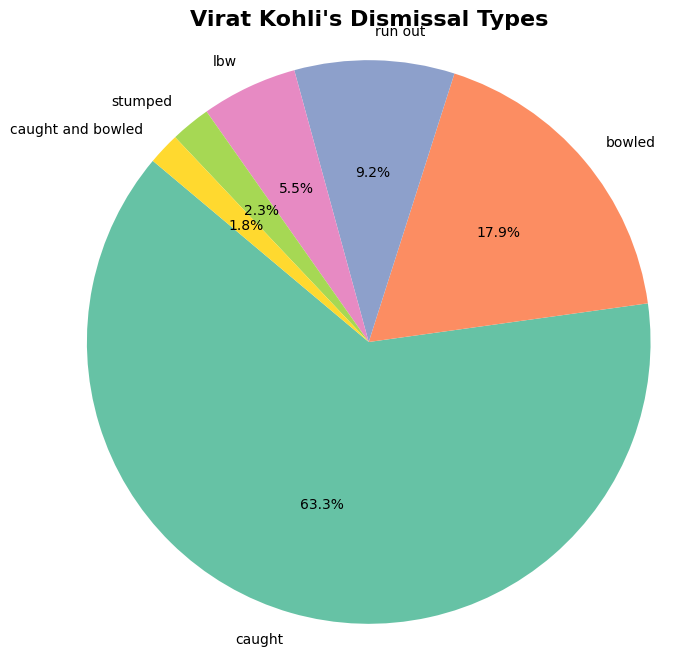

In [35]:
dismissals_df = df[df['is_wicket'] == 1].copy()

dismissal_counts = dismissals_df['dismissal_kind'].value_counts()
colors = sns.color_palette('Set2')[0:len(dismissal_counts)]

plt.figure(figsize=(8, 8))
plt.pie(
    dismissal_counts,
    labels=dismissal_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Virat Kohli's Dismissal Types", fontsize=16, fontweight='bold')
plt.axis('equal')

plt.show()

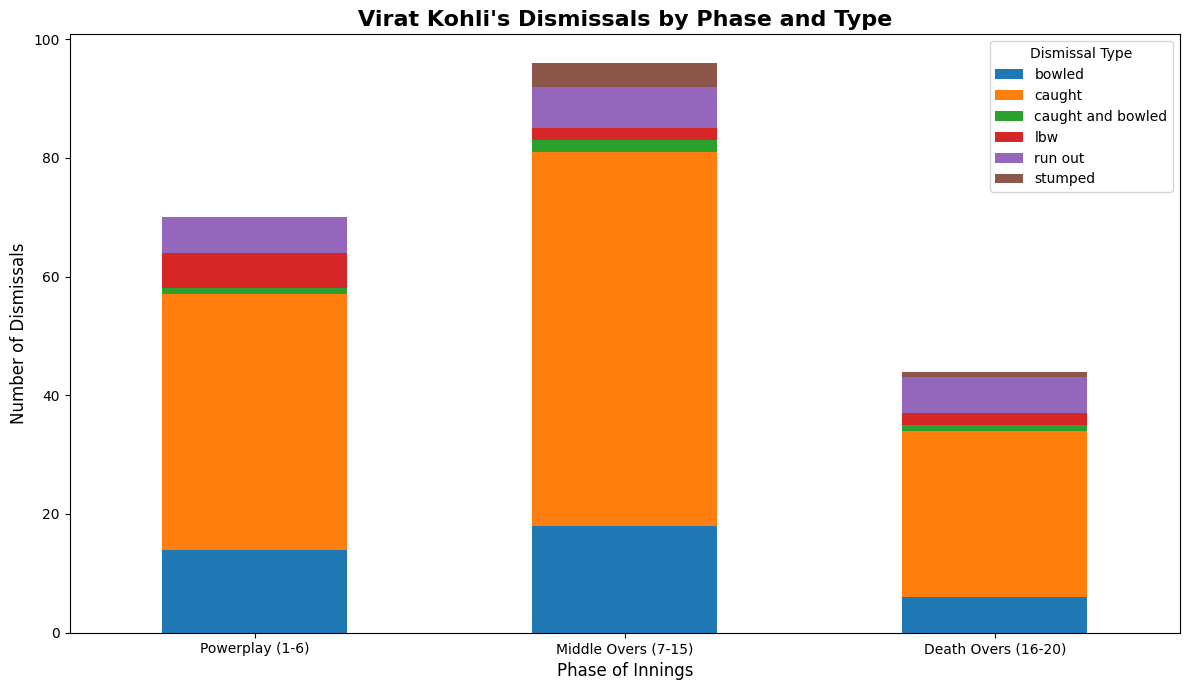

In [ ]:
dismissals_df = df[df['is_wicket'] == 1].copy()
def get_phase(over):
    if over in range(1, 7):
        return 'Powerplay (1-6)'
    elif over in range(7, 16):
        return 'Middle Overs (7-15)'
    elif over in range(16, 21):
        return 'Death Overs (16-20)'
    return 'Other'

dismissals_df['phase'] = dismissals_df['over'].apply(get_phase)
dismissal_phase_counts = dismissals_df.groupby(['phase', 'dismissal_kind']).size().unstack(fill_value=0)

phase_order = ['Powerplay (1-6)', 'Middle Overs (7-15)', 'Death Overs (16-20)']
dismissal_phase_counts = dismissal_phase_counts.reindex(phase_order)

fig, ax = plt.subplots(figsize=(12, 7))
dismissal_phase_counts.plot(kind='bar', stacked=True, ax=ax)

ax.set_title("Virat Kohli's Dismissals by Phase and Type", fontsize=16, fontweight='bold')
ax.set_xlabel("Phase of Innings", fontsize=12)
ax.set_ylabel("Number of Dismissals", fontsize=12)
ax.set_xticklabels(dismissal_phase_counts.index, rotation=0)
ax.legend(title="Dismissal Type")
plt.tight_layout()
plt.show()

**Bowlers Who Have Dismissed Virat Kohli Most Frequently**

This table highlights the bowlers who have dismissed Virat Kohli the highest number of times in the IPL, along with his batting statistics against them.

In [51]:
bowler_stats_against_kohli = df.groupby('bowler').agg(
    total_runs_against=('batsman_runs', 'sum'),
    balls_faced_against=('ball', 'count'),
    dismissals_by=('player_dismissed', lambda x: x.notna().sum()),
    fours_against=('batsman_runs', lambda x: (x == 4).sum()),
    sixes_against=('batsman_runs', lambda x: (x == 6).sum())
).reset_index()

bowler_stats_against_kohli['batting_average_against'] = bowler_stats_against_kohli.apply(
    lambda row: row['total_runs_against'] / row['dismissals_by'] if row['dismissals_by'] > 0 else 0, axis=1
)
bowler_stats_against_kohli['strike_rate_against'] = bowler_stats_against_kohli.apply(
    lambda row: (row['total_runs_against'] / row['balls_faced_against']) * 100 if row['balls_faced_against'] > 0 else 0, axis=1
)

bowler_stats_against_kohli['boundaries_against'] = bowler_stats_against_kohli['fours_against'] + bowler_stats_against_kohli['sixes_against']

bowler_stats_against_kohli['balls_per_boundary_against'] = bowler_stats_against_kohli.apply(
    lambda row: row['balls_faced_against'] / row['boundaries_against'] if row['boundaries_against'] > 0 else 0, axis=1
)

successful_bowlers_stats = bowler_stats_against_kohli[[
    'bowler',
    'dismissals_by',
    'total_runs_against',
    'batting_average_against',
    'strike_rate_against',
    'fours_against',
    'sixes_against',
    'balls_per_boundary_against'
]]

successful_bowlers_stats.columns = [
    'Bowler',
    'Dismissals Against Kohli',
    'Runs Scored Against',
    'Average Against',
    'Strike Rate Against',
    '4s Against',
    '6s Against',
    'Balls per Boundary Against'
]

top_10_successful_bowlers = successful_bowlers_stats.sort_values(by='Dismissals Against Kohli', ascending=False).head(10).reset_index(drop=True)
top_10_successful_bowlers.index = top_10_successful_bowlers.index + 1

display(top_10_successful_bowlers)

,Bowler,Dismissals Against Kohli,Runs Scored Against,Average Against,Strike Rate Against,4s Against,6s Against,Balls per Boundary Against
1,Sandeep Sharma,7,104,14.857143,140.540541,14,1,4.933333
2,A Nehra,6,60,10.000000,105.263158,7,2,6.333333
3,RA Jadeja,5,157,31.400000,106.081081,8,4,12.333333
4,JJ Bumrah,5,140,28.000000,145.833333,15,5,4.800000
5,UT Yadav,5,168,33.600000,171.428571,19,7,3.769231
6,Mohammed Shami,5,107,21.400000,133.750000,17,0,4.705882
7,B Kumar,5,129,25.800000,137.234043,20,3,4.086957
8,DS Kulkarni,4,101,25.250000,123.170732,13,1,5.857143
9,MJ McClenaghan,4,39,9.750000,95.121951,2,1,13.666667
10,Z Khan,4,64,16.000000,148.837209,7,2,4.777778
